# **Data import**

In [ ]:
from glob import glob
import cv2
import os
import numpy as np
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Importing videos**

In [ ]:

# install opencv-python or upgrade opencv-python: pip3 install opencv-python or pip install --upgrade opencv-python
# Didn't successfully update movie file.
#for python 2.7: pip install glob2 
#for python 3.7: pip3 install glob3

digits = re.compile(r'(\d+)')
_nsre = re.compile('([0-9]+)')

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

def tokenize(filename):
    return tuple(int(token) if match else token
                 for token, match in
                 ((fragment, digits.search(fragment))
                  for fragment in digits.split(filename)))

## put full_path here and put a name for your mp4 video, e.g.: /Users/jim/Desktop/video.mp4
video_name = '/content/drive/MyDrive/Video.mp4'

## the images of the provided dataset should be extracted to a folder; privide here the full path to that folder and then add: /*')
## e.g.: /Users/jim/Desktop/dataset/*
images = glob('/content/drive/MyDrive/DataSets/vol/deform/dk15/attribute_db/emotionet_3/continue/*')
images.sort(key=natural_sort_key)

fourcc = cv2.VideoWriter_fourcc((*'mp4v'))

video = cv2.VideoWriter(video_name, fourcc, 1, (1280 , 720  ))


for image in images:
	video.write(cv2.resize(cv2.imread(image), (1280 , 720  )))

video.release()

## put full_path here and put a name for your text file that will list the name of the images in the order they are merged to form the video, e.g.: /Users/jim/Desktop/image_names.txt
file_name = '/content/drive/MyDrive/image_names.txt'
with open(file_name,'w') as fil:
  for image in images:
  	fil.write(image+'\n')
    

# **Converting Files to CSV**

In [ ]:
file_name = '/content/drive/MyDrive/Annotations.txt'
with open(file_name) as fil:
 content = fil.readlines()

outputs = []

for elem in content:
 if 'N/A' in elem:
   continue
 else:
   line = elem.split(',')
   outputs.append([int(line[1]),int(line[3]),int(line[5]),int(line[7]),int(line[9]),int(line[11])])

print(outputs)

outputs.count

[[0, 0, 0, 0, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 5, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 4, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [0, 1, 2, 1, 2, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 2, 0], [0, 1, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 0, 2, 0], [0, 1, 0, 0, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 8, 3, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 1, 2, 0], [0, 1, 0, 2, 2, 0], [0, 0, 0, 1, 1, 0], [0, 1, 0, 3, 1, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 6, 2, 0], [0, 0, 0, 3, 3, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 2, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 2, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 2, 5, 1, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0],

<function list.count>

In [ ]:
file_name = '/content/drive/MyDrive/Annotations.txt'
with open(file_name) as fil:
 content = fil.readlines()

 f = open("demofile.txt", "a")
 outputs = []

 for elem in content:
  if 'N/A' in elem:
   continue
  else:
   line = elem.split(',')
   outputs.append([int(line[1]), int(line[3]), int(line[5]), int(line[7]), int(line[9]), int(line[11])])
   f.write(line[1]+","+line[3]+","+line[5]+","+line[7]+","+line[9]+","+line[11]+"\n")

print(outputs)
f.close()

[[0, 0, 0, 0, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 5, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 4, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [1, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 0, 2, 0], [0, 1, 2, 1, 2, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 2, 0], [0, 1, 0, 0, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 0, 2, 0], [0, 1, 0, 0, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 8, 3, 0], [0, 0, 0, 8, 3, 0], [0, 0, 0, 1, 2, 0], [0, 1, 0, 2, 2, 0], [0, 0, 0, 1, 1, 0], [0, 1, 0, 3, 1, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 6, 2, 0], [0, 0, 0, 3, 3, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 2, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 2, 2, 0], [0, 0, 0, 4, 2, 0], [0, 0, 0, 1, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 2, 5, 1, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 3, 2, 0], [0, 0, 0, 0, 2, 0], [0, 0, 0, 1, 2, 0],

In [ ]:
read_file1 = pd.read_csv (r'/content/drive/MyDrive/image_names.txt',header=None)
read_file2 = pd.read_csv (r'/content/demofile.txt',header=None)
read_file1.columns = ['Images']
read_file2.columns = ['wrinkles','freakles','glasses','hair color','hair top','not human'] 
read_file1['wrinkles'] = read_file2['wrinkles']
read_file1['freakles'] = read_file2['freakles']
read_file1['glasses'] = read_file2['glasses']
read_file1['hair color'] = read_file2['hair color']
read_file1['hair color'][15]=2
read_file1['hair top'] = read_file2['hair top']
read_file1['not human'] = read_file2['not human']





In [ ]:
read_file1.to_csv (r'/content/drive/MyDrive/CSV/InputFile.csv', index=None)

# **Extract images from links**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CSV/InputFile.csv")
data["Images"]
l=[]
for i in range (0,data.shape[0]):
  l.append(data["Images"][i])

images=[]
for j in range (0,data.shape[0]):
 img = cv2.imread(l[j]) 
 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 img = cv2.resize(img, (96,96),interpolation=cv2.INTER_AREA)
 images.append(img)
 

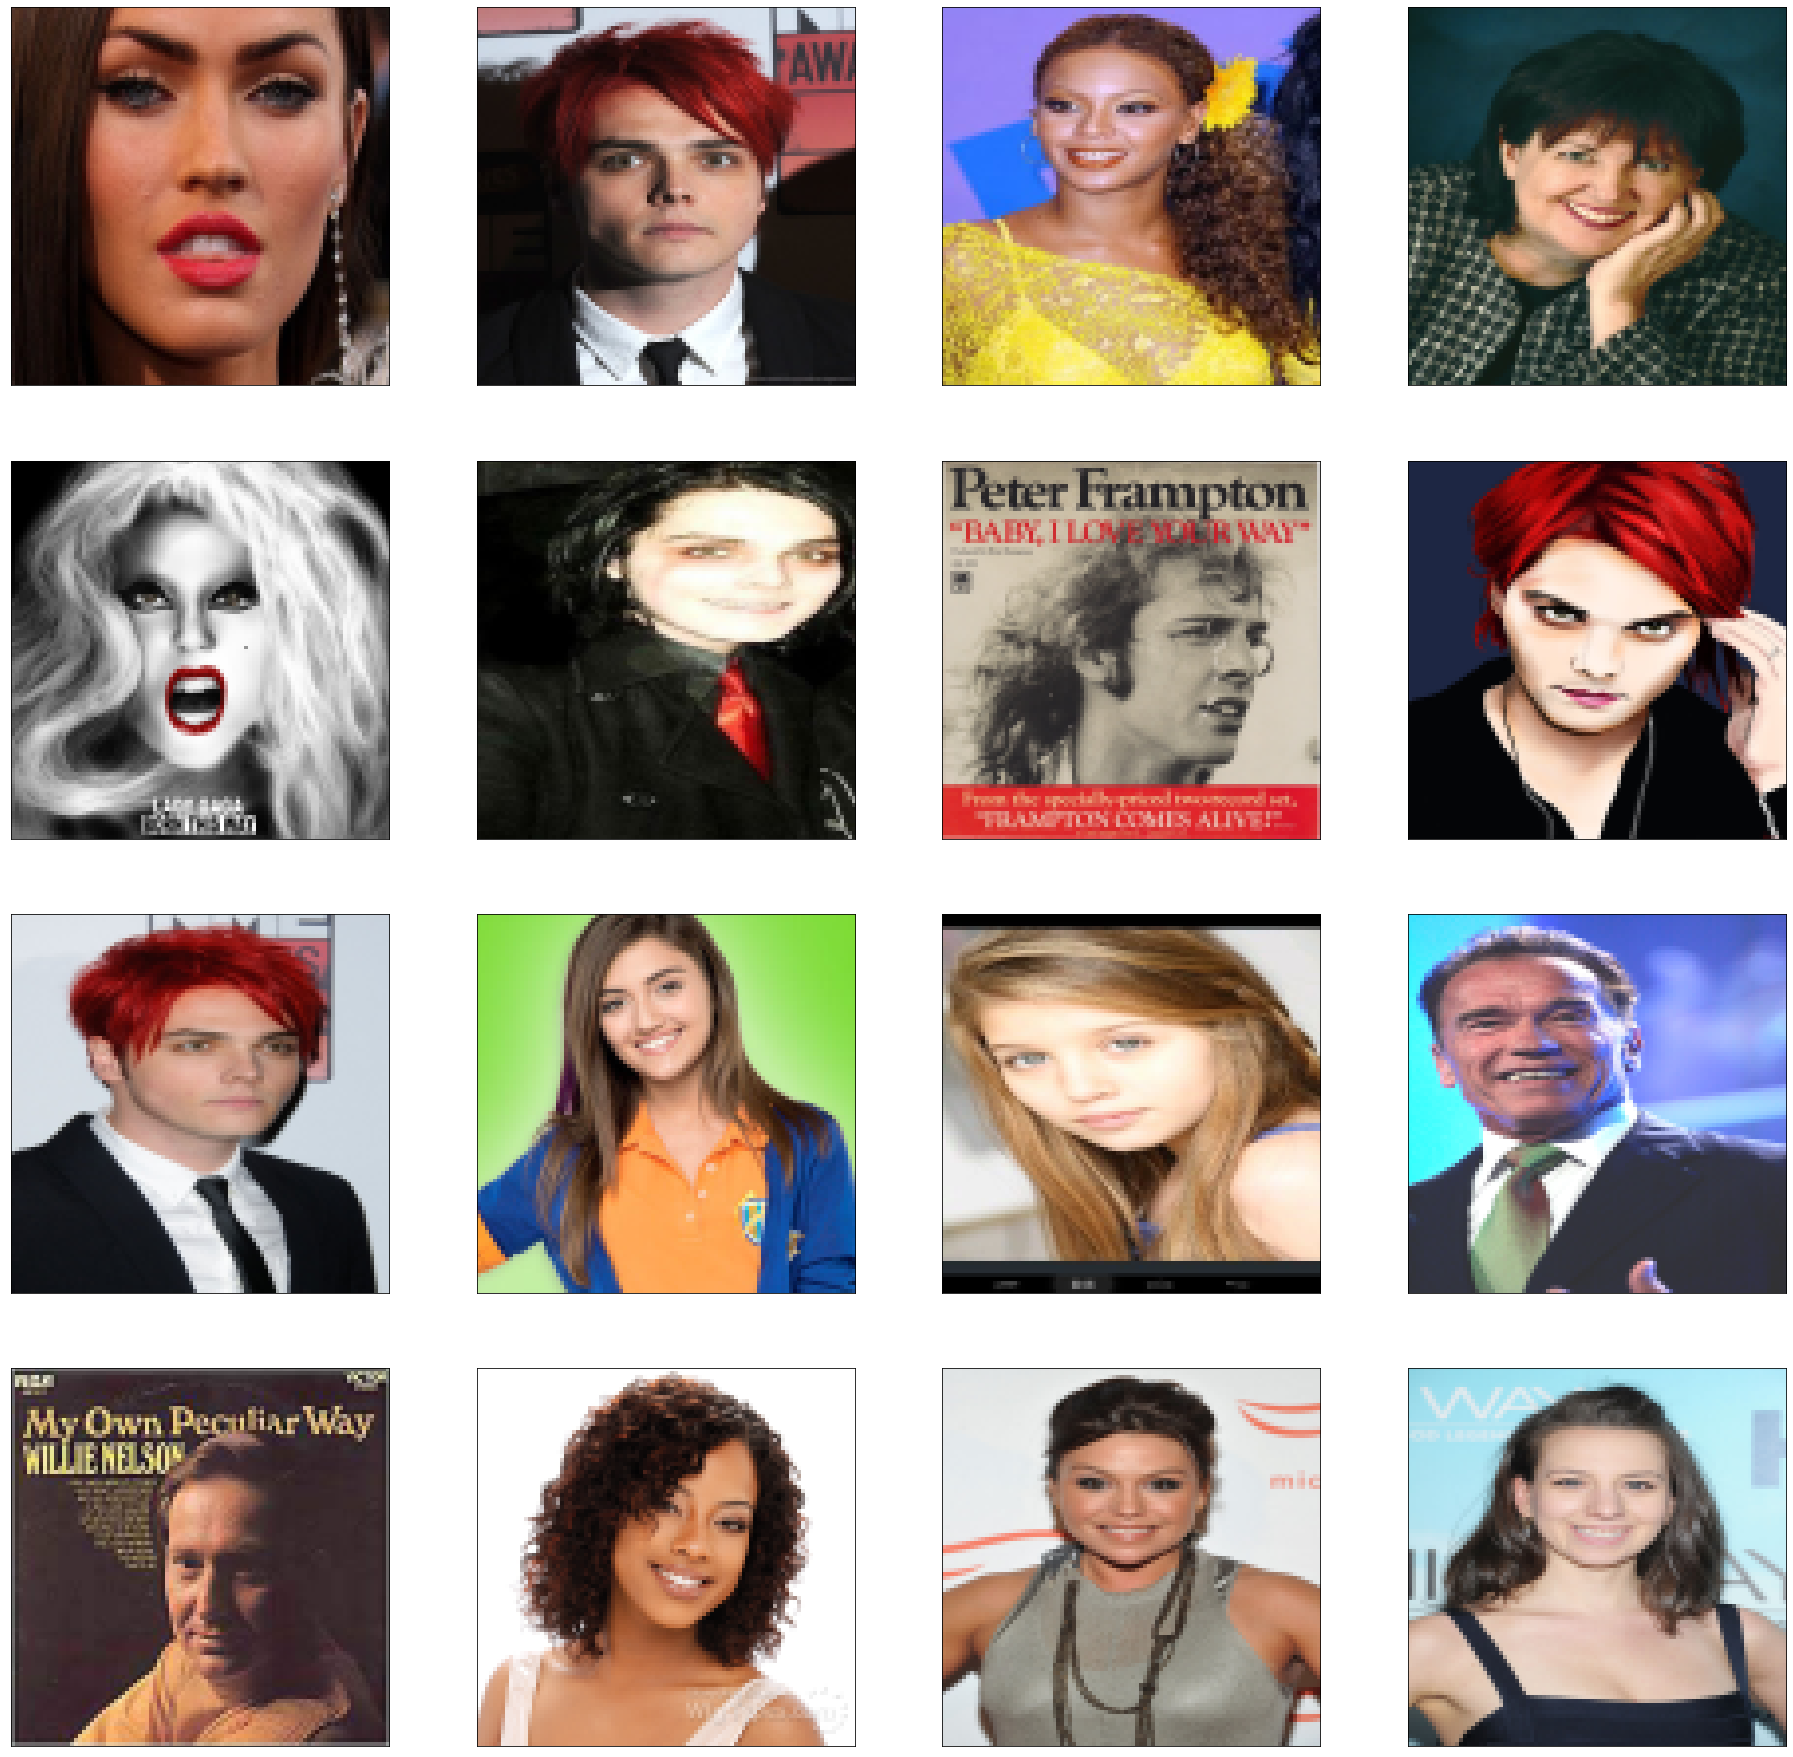

In [ ]:
plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    #The CIFAR labels happen to be arrays, 
    #which is why you need the extra index
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# **Preprocessing and Model Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data.drop(['Images'],axis=1) , train_size=0.8,test_size=0.2)





In [ ]:
#Normalising
X_test=X_test/255.0
X_train=X_train/255.0



# **Wrinkle**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["wrinkles"] , train_size=0.8,test_size=0.2)
X_test=X_test/255.0
X_train=X_train/255.0


from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(3, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0  

Epoch 1/10
13/13 [==============================] - 10s 700ms/step - loss: 0.6820 - accuracy: 0.7869 - val_loss: 0.3252 - val_accuracy: 0.9062
Epoch 2/10
13/13 [==============================] - 9s 687ms/step - loss: 0.3667 - accuracy: 0.8914 - val_loss: 0.3130 - val_accuracy: 0.9062
Epoch 3/10
13/13 [==============================] - 9s 691ms/step - loss: 0.3234 - accuracy: 0.9010 - val_loss: 0.3115 - val_accuracy: 0.9062
Epoch 4/10
13/13 [==============================] - 9s 674ms/step - loss: 0.3020 - accuracy: 0.9116 - val_loss: 0.3118 - val_accuracy: 0.9062
Epoch 5/10
13/13 [==============================] - 9s 665ms/step - loss: 0.3137 - accuracy: 0.9052 - val_loss: 0.3138 - val_accuracy: 0.9062
Epoch 6/10
13/13 [==============================] - 9s 659ms/step - loss: 0.3290 - accuracy: 0.9004 - val_loss: 0.3120 - val_accuracy: 0.9062
Epoch 7/10
13/13 [==============================] - 8s 655ms/step - loss: 0.3208 - accuracy: 0.9016 - val_loss: 0.3163 - val_accuracy: 0.9062
Epoch

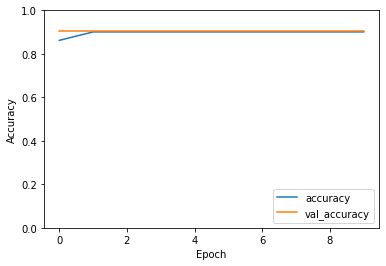

In [ ]:
history = model.fit(X_train,y_train , epochs=10, batch_size=250,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test , verbose=2)

print(test_acc)



In [ ]:
model.save("/content/drive/MyDrive/CSV/VGG16_Wrinkle(1).h5")

***Testing, predection***

actual label have no wrinkes
predicted label have no wrinkes


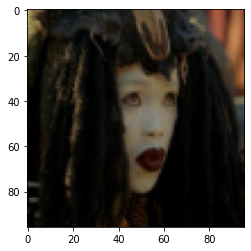

In [ ]:
label_to_text={0:'no wrinkes',1:'wrinkles'}
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label have {label_to_text[y_test.iloc[k]]}')
  predicted_class=model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label have {label_to_text[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(2)
  clear_output(wait=True)

In [ ]:
predicted_class=[]
for k in range(len(y_test)):
  predicted_class.append(model.predict(tf.expand_dims(X_test[k],0)).argmax())
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)
unique(predicted_class)

0


# **Freakles**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["freakles"] , train_size=0.8,test_size=0.2)
X_test=X_test/255.0
X_train=X_train/255.0


from keras.applications.resnet50 import ResNet50
from keras.models import Model

# load model without classifier layers
model = ResNet50(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
output = layers.Dense(10, activation='softmax')(flat1)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])






Epoch 1/15
13/13 [==============================] - 23s 1s/step - loss: 1.5239 - accuracy: 0.6645 - val_loss: 0.3075 - val_accuracy: 0.9112
Epoch 2/15
13/13 [==============================] - 8s 595ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.4936 - val_accuracy: 0.9112
Epoch 3/15
13/13 [==============================] - 8s 600ms/step - loss: 0.0186 - accuracy: 0.9956 - val_loss: 0.3604 - val_accuracy: 0.9112
Epoch 4/15
13/13 [==============================] - 8s 603ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4681 - val_accuracy: 0.9087
Epoch 5/15
13/13 [==============================] - 8s 604ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 0.9112
Epoch 6/15
13/13 [==============================] - 8s 607ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3224 - val_accuracy: 0.9112
Epoch 7/15
13/13 [==============================] - 8s 609ms/step - loss: 7.3777e-04 - accuracy: 1.0000 - val_loss: 0.3332 - val_accuracy: 0.9112
Epoc

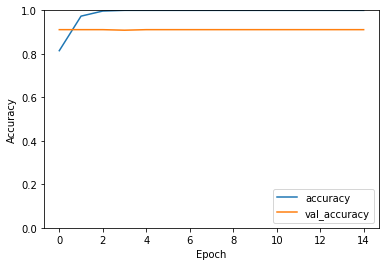

In [ ]:
history = model.fit(X_train,y_train , epochs=15, batch_size=250,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(test_acc)



actual label have no freakles
predicted label have no freakles


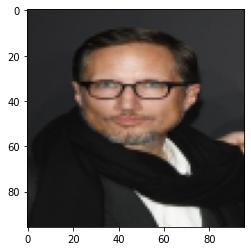

In [ ]:
label_to_text={0:'no freakles',1:'freakles'}
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label have {label_to_text[y_test.iloc[k]]}')
  predicted_class=model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label have {label_to_text[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(2)
  clear_output(wait=True)

In [ ]:
model.save("/content/drive/MyDrive/CSV/freakles(1).h5")

# **Glasses**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["glasses"] , train_size=0.6,test_size=0.4)
X_test=X_test/255.0
X_train=X_train/255.0


from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(5, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()







Epoch 1/10
5/5 [==============================] - 61s 4s/step - loss: 2.3787 - accuracy: 0.4498 - val_loss: 1.5301 - val_accuracy: 0.1681
Epoch 2/10
5/5 [==============================] - 12s 3s/step - loss: 0.7381 - accuracy: 0.9033 - val_loss: 0.9582 - val_accuracy: 0.8612
Epoch 3/10
5/5 [==============================] - 12s 3s/step - loss: 0.4756 - accuracy: 0.8839 - val_loss: 0.5226 - val_accuracy: 0.8938
Epoch 4/10
5/5 [==============================] - 12s 3s/step - loss: 0.3502 - accuracy: 0.9005 - val_loss: 1.2183 - val_accuracy: 0.8938
Epoch 5/10
5/5 [==============================] - 12s 3s/step - loss: 0.3180 - accuracy: 0.9292 - val_loss: 1.4077 - val_accuracy: 0.8938
Epoch 6/10
5/5 [==============================] - 12s 3s/step - loss: 0.2103 - accuracy: 0.9412 - val_loss: 1.3522 - val_accuracy: 0.8938
Epoch 7/10
5/5 [==============================] - 12s 3s/step - loss: 0.1402 - accuracy: 0.9517 - val_loss: 1.3096 - val_accuracy: 0.8938
Epoch 8/10
5/5 [==================

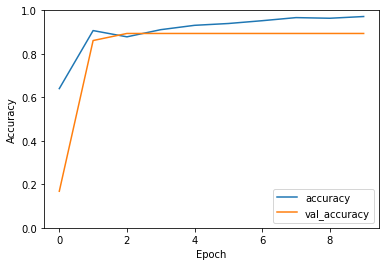

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Model
from tensorflow import keras

data_augmentation = keras.Sequential(
    [   #preprocessing.Resizing(height=32, width=32, interpolation="bilinear"),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ]
)
# the augmentation is being made part of the model. Note that data augmentation is inactive at test time.

# Create a model that includes the augmentation stage
input_shape = (96, 96, 3)
classes = 10


inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Add the rest of the model
model = keras.applications.ResNet50(include_top=False,
    weights='imagenet', input_shape=input_shape)(x)

# add new classifier layers
flat1 = layers.Flatten()(model)
outputs = layers.Dense(10, activation='softmax')(flat1)



# define new model
model = Model(inputs=inputs, outputs= outputs)


model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




# initialize the number of epochs and batch size
EPOCHS = 10
BS = 256


# train the network
history = model.fit(X_train,y_train, epochs=10, batch_size=500,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(test_acc)

In [ ]:
history = model.fit(X_train,y_train, epochs=10, batch_size=500,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(test_acc)



In [ ]:
model.save("/content/drive/MyDrive/CSV/VGG16_Glasses(1).h5")

actual label have no glasses
predicted label have no glasses


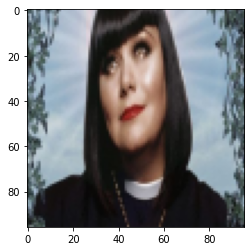

In [ ]:
label_to_text={0:'no glasses',1:'wears glasses',2:'wears sunglasses'}
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label have {label_to_text[y_test.iloc[k]]}')
  predicted_class=model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label have {label_to_text[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(2)
  clear_output(wait=True)

In [ ]:
predicted_class=[]
for k in range(len(y_test)):
  predicted_class.append(model.predict(tf.expand_dims(X_test[k],0)).argmax())
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)
unique(predicted_class)

0


# **Hair Color**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["hair color"] , train_size=0.8,test_size=0.2)
X_test=X_test/255.0
X_train=X_train/255.0



from keras.applications.resnet50 import ResNet50
from keras.models import Model

# load model without classifier layers
model = ResNet50(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
output = layers.Dense(10, activation='softmax')(flat1)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



Epoch 1/10
11/11 [==============================] - 20s 911ms/step - loss: 3.1769 - accuracy: 0.1819 - val_loss: 2.1164 - val_accuracy: 0.2612
Epoch 2/10
11/11 [==============================] - 8s 692ms/step - loss: 0.5091 - accuracy: 0.8606 - val_loss: 2.3340 - val_accuracy: 0.1425
Epoch 3/10
11/11 [==============================] - 8s 695ms/step - loss: 0.0918 - accuracy: 0.9956 - val_loss: 2.4373 - val_accuracy: 0.1825
Epoch 4/10
11/11 [==============================] - 8s 700ms/step - loss: 0.0288 - accuracy: 0.9988 - val_loss: 2.2611 - val_accuracy: 0.1825
Epoch 5/10
11/11 [==============================] - 8s 701ms/step - loss: 0.0146 - accuracy: 0.9990 - val_loss: 2.3484 - val_accuracy: 0.1887
Epoch 6/10
11/11 [==============================] - 8s 703ms/step - loss: 0.0100 - accuracy: 0.9997 - val_loss: 2.3870 - val_accuracy: 0.1937
Epoch 7/10
11/11 [==============================] - 8s 707ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 2.5055 - val_accuracy: 0.1963
Epoch

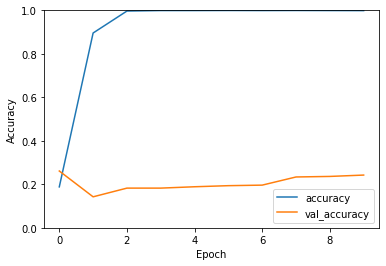

In [ ]:
history = model.fit(X_train,y_train , epochs=10, batch_size=300,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test , verbose=2)

print(test_acc)



In [ ]:
model.save("/content/drive/MyDrive/CSV/VGG16_HairColor(1).h5")

***Testing,predection***

actual label have white
predicted label have brown


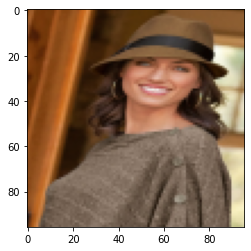

In [ ]:
label_to_text={0:'brown',1:'black',2:'grey',3:'blond',4:'red',5:'white',6:'mixed',7:'other',8:'not visible'}
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label have {label_to_text[y_test.iloc[k]]}')
  predicted_class=model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label have {label_to_text[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(1)
  clear_output(wait=True)

In [ ]:
predicted_class=[]
for k in range(len(y_test)):
  predicted_class.append(model.predict(tf.expand_dims(X_test[k],0)).argmax())
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)


# **Hair Top**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["hair top"] , train_size=0.8,test_size=0.2)
X_test=X_test/255.0
X_train=X_train/255.0

from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(1, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()






Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0  

Epoch 1/10
11/11 [==============================] - 32s 1s/step - loss: nan - accuracy: 0.1585 - val_loss: nan - val_accuracy: 0.1363
Epoch 2/10
11/11 [==============================] - 8s 703ms/step - loss: nan - accuracy: 0.1477 - val_loss: nan - val_accuracy: 0.1363
Epoch 3/10
11/11 [==============================] - 8s 696ms/step - loss: nan - accuracy: 0.1402 - val_loss: nan - val_accuracy: 0.1363
Epoch 4/10
11/11 [==============================] - 8s 691ms/step - loss: nan - accuracy: 0.1412 - val_loss: nan - val_accuracy: 0.1363
Epoch 5/10
11/11 [==============================] - 8s 688ms/step - loss: nan - accuracy: 0.1453 - val_loss: nan - val_accuracy: 0.1363
Epoch 6/10
11/11 [==============================] - 7s 684ms/step - loss: nan - accuracy: 0.1414 - val_loss: nan - val_accuracy: 0.1363
Epoch 7/10
11/11 [==============================] - 7s 683ms/step - loss: nan - accuracy: 0.1310 - val_loss: nan - val_accuracy: 0.1363
Epoch 8/10
11/11 [==============================] 

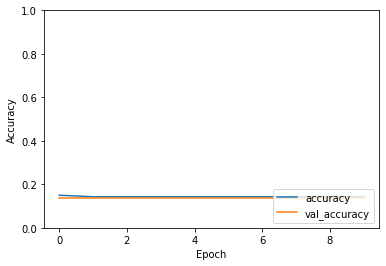

In [ ]:
history = model.fit(X_train,y_train , epochs=10, batch_size=300,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test , verbose=2)

print(test_acc)



In [ ]:
model.save("/content/drive/MyDrive/CSV/VGG16_Hair_Top(1).h5")

***Testing,predection***

actual label have thick hair
predicted label have Bald


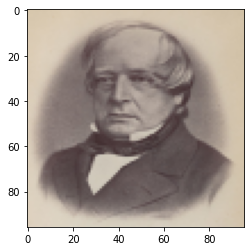

In [ ]:
label_to_text={0:'Bald',1:' has few hair',2:'thick hair',3:'not visible'}
from IPython.display import clear_output
import time
for k in range(10):
  print(f'actual label have {label_to_text[y_test.iloc[k]]}')
  predicted_class=model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label have {label_to_text[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(1)
  clear_output(wait=True)

In [ ]:
predicted_class=[]
for k in range(len(y_test)):
  predicted_class.append(model.predict(tf.expand_dims(X_test[k],0)).argmax())
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)
unique(predicted_class)

2
0
1
3


# **Not Human**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images,dtype=np.float),data["not human"] , train_size=0.8,test_size=0.2)
X_test=X_test/255.0
X_train=X_train/255.0

from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(96, 96, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(2, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()




Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

Epoch 1/10
7/7 [==============================] - 53s 4s/step - loss: 0.7071 - accuracy: 0.6307 - val_loss: 0.2872 - val_accuracy: 0.9175
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.2900 - accuracy: 0.9216 - val_loss: 0.3199 - val_accuracy: 0.9175
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.2851 - accuracy: 0.9230 - val_loss: 0.2882 - val_accuracy: 0.9175
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.2833 - accuracy: 0.9212 - val_loss: 0.2946 - val_accuracy: 0.9175
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.2796 - accuracy: 0.9230 - val_loss: 0.2867 - val_accuracy: 0.9175
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.2720 - accuracy: 0.9234 - val_loss: 0.2901 - val_accuracy: 0.9175
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.2705 - accuracy: 0.9235 - val_loss: 0.2857 - val_accuracy: 0.9175
Epoch 8/10
7/7 [========================

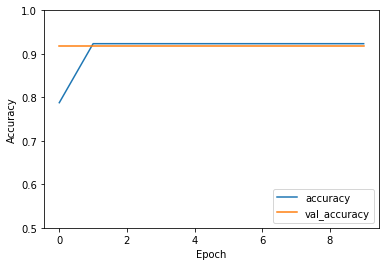

In [ ]:
history = model.fit(X_train,y_train , epochs=10, batch_size=512,
                    validation_data=(X_test,y_test))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test , verbose=2)

print(test_acc)

model.save("/content/drive/MyDrive/CSV/VGG16_Not_Human.h5")